# Task : Prediction using Supervised ML

## Task Description :  Predict the percentage of a student based on the no. of study hours     using Simple Linear Regression

### Author : Rucha Kulkarni

*Import all the required libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

*Load the dataset*

In [2]:
url_link="http://bit.ly/w-data"
dataset=pd.read_csv(url_link)
#dataset

In [3]:
#Display the first 5 rows in the dataset
dataset[:5]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Print short summary of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Find the pairwise corelation of all the columns in the DataFrame
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above table, a strong corelation can be seen which means that there is a stronger linear relation between the two variables : hours and scores

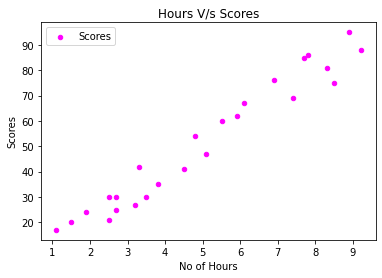

In [6]:
#Represent the datapoints on the 2-d graph to manually find the relationship between the two variables 
dataset.plot(kind='scatter',x='Hours',y='Scores',color='magenta',label='Scores')
plt.xlabel('No of Hours')  
plt.ylabel('Scores')  
plt.title('Hours V/s Scores')
plt.show()

From the above graph, a positive linear relationship between the variables can be seen

### Data Preparation

Divide the data into attributes(independent variable) and labels(dependent variable).
Here, X is the independent variable which is “Hours”
and y is the dependent variable which is “Scores”

In [7]:
X=dataset.iloc[:, :-1].values
#X
y=dataset.iloc[:,1].values
#y


Split the dataset into training set and test set.
The training dataset is used for training the model and then check the performance of the model on the test dataset.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Fit Simple Linear Regression model to training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predict the test set results

In [10]:
y_pred = regressor.predict(X_test)
y_pred 

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

y_pred are the predicted scores from our model

In [11]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

y_test are actual scores of the dataset

In [12]:
#Compare Actual vs Predicted
d1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
d1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

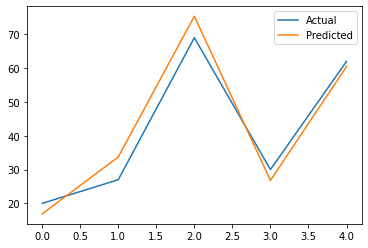

In [13]:
##Represent the Actual V/s Predicted on the 2-d graph
d1.plot()

### Data Visualization

Plot the Regression Line i.e Visualize the training set

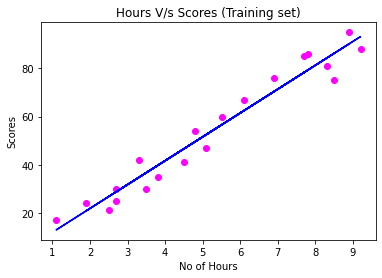

In [14]:
plt.scatter(X_train, y_train, color = 'magenta') # plot the actual data points of training set
plt.plot(X_train, regressor.predict(X_train), color='blue') # plot the regression line
plt.title('Hours V/s Scores (Training set)')
plt.xlabel('No of Hours')  
plt.ylabel('Scores') 
plt.show()

 Visualize the test set

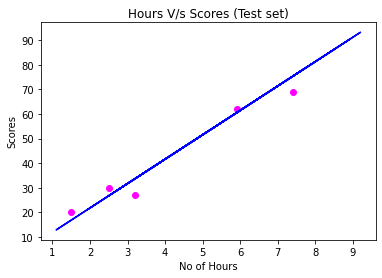

In [15]:
plt.scatter(X_test, y_test, color = 'magenta') # plot the actual data points of test set
plt.plot(X_train, regressor.predict(X_train), color='blue') # plot the regression line
plt.title('Hours V/s Scores (Test set)')
plt.xlabel('No of Hours')  
plt.ylabel('Scores') 
plt.show()

### Make new predictions

In [16]:
new_scores_pred = regressor.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is {}".format(new_scores_pred))

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]


### Model Evaluation

Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are the most popular evaluation metrics used in regression problems.

MAE : Mean of the absolute value of the errors
MSE: Mean of the squared errors
RMSE: Square root of the mean of the squared errors

Lower the values of these Evaluation metrics, better is the performance of the model.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
